### Instalar dependencias

In [ ]:
%pip install pandas
%pip install tabulate
%pip install matplotlib
%pip install statsmodels
%pip install -U scikit-learn
%pip install lxml

### Imports del proyecto

Instalar 

```bash
brew install python-tk
``` 

Definir el exec de python de brew en el caso de macos 

```bash
export PATH="/opt/homebrew/opt/python/libexec/bin:$PATH" >> ~/.zshrc

source ~/.zshrc
```

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from io import StringIO

### Biblioteca Tkinter para generar gráficos en ventanas independientes (Opcional)
Esta línea configura el backend de Matplotlib para usar Tkinter (a través de su interfaz "TKAgg") como motor de renderizado para generar gráficos y visualizaciones en una ventana independiente.

In [5]:
#matplotlib.use('TKAgg')

### Print  Tabulate

Esta función imprime un DataFrame en forma de tabla bien formateada.

In [14]:
from IPython.display import HTML, display


def print_tabulate(df: pd.DataFrame):
    display(HTML(tabulate(df, headers=df.columns, tablefmt="html")))

## Función: transform_variable

La función `transform_variable` se utiliza para transformar una variable en un DataFrame según su tipo de datos.

### Parámetros

- `df` (pd.DataFrame): El DataFrame que contiene la variable a transformar.
- `x` (str): El nombre de la variable a transformar.

### Devuelve

- Si la variable es de tipo numérico, la función devuelve la variable como una serie de pandas.
- Si la variable no es de tipo numérico, la función devuelve una nueva serie de pandas con el índice igual al del DataFrame y los valores como una secuencia desde 0 hasta la longitud de la variable.


In [4]:
def transform_variable(df: pd.DataFrame, x: str) -> pd.Series:
    if np.issubdtype(df[x].dtype, np.number):
        return df[x]
    else:
        return pd.Series(range(len(df[x])), index=df.index)

Función: plot_regression_results
--------------------------------

La función `plot_regression_results` muestra los resultados de un modelo de regresión lineal en un gráfico de dispersión.

Parámetros:
-----------

- `df`: DataFrame de pandas con los datos a utilizar en el gráfico.
- `x`: nombre de la columna de la variable independiente.
- `y`: nombre de la columna de la variable dependiente.
- `model`: objeto del modelo de regresión lineal a utilizar para predecir los valores de la variable dependiente.
- `fixed_x`: variable independiente transformada y escalada si es necesario.
- `model_name`: nombre del modelo de regresión lineal a utilizar en el nombre del archivo de la imagen.

Retorna:
--------

La función no retorna ningún valor, pero muestra un gráfico de dispersión con la línea de regresión y la línea del promedio de la variable dependiente.

Descripción:
------------

1. Se obtienen los coeficientes del modelo de regresión lineal.
2. Se muestra un gráfico de dispersión con los datos originales utilizando la función `plot` de pandas.
3. Se agrega la línea del promedio de la variable dependiente al gráfico.
4. Se agrega la línea de regresión al gráfico utilizando el modelo y la variable independiente transformada y escalada si es necesario.
5. Se configuran las etiquetas de los ejes y el título del gráfico.
6. Se guarda el gráfico en formato PNG.
7. Se muestra el gráfico utilizando la función `show` de matplotlib.
8. Se cierra el gráfico utilizando la función `close` de matplotlib.

In [5]:
def plot_regression_results(df: pd.DataFrame, x: str, y: str, model, fixed_x, model_name: str) -> None:
    coef, intercept = model.coef_[0], model.intercept_

    print(f"coef: {coef} intercept: {intercept}", flush=True)

    df.plot(x=x, y=y, kind='scatter')
    plt.plot(df[x], [df[y].mean()] * len(df), color='green', label='Mean of y')
    plt.plot(df[x], model.predict(fixed_x), color='red', label='Regression Line')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=90)
    plt.legend()
    plt.savefig(f'../img/linear_regression/{model_name}_{y}_{x}.png')
    plt.show()
    plt.close()

## Función: linear_regression

La función `linear_regression` se utiliza para realizar una regresión lineal entre dos variables en un DataFrame y mostrar el resultado en un gráfico de dispersión.

### Parámetros

- `df` (pd.DataFrame): El DataFrame que contiene las variables a analizar.
- `x` (str): El nombre de la variable independiente.
- `y` (str): El nombre de la variable dependiente.

### Devuelve

- La función no devuelve ningún valor, pero muestra la tabla de estadísticas de la regresión lineal en la consola y el gráfico de dispersión con la línea de regresión y la línea del promedio de la variable dependiente.

In [6]:
def linear_regression(df: pd.DataFrame, x: str, y: str) -> None:
    fixed_x = transform_variable(df, x)
    model = sm.OLS(df[y], sm.add_constant(fixed_x)).fit()
    print(model.summary())

    # Obtener los coeficientes del modelo
    coef = pd.read_html(
        StringIO(model.summary().tables[1].as_html()),
        header=0,
        index_col=0
    )[0]['coef']

    # Crear el gráfico de dispersión
    df.plot(x=x, y=y, kind='scatter')

    # Agregar la línea del promedio de y
    plt.plot(df[x], [df[y].mean()] * len(df), color='green', label='Mean of y')

    # Agregar la línea de regresión
    plt.plot(df[x], coef.iloc[1] * fixed_x + coef.iloc[0], color='red', label='Regression Line')

    # Configurar las etiquetas de los ejes y el título
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=90)
    plt.legend()

    # Guardar el gráfico
    plt.savefig(f'../img/linear_regression/linear_stat_{y}_{x}.png')
    plt.show()
    plt.close()

## Función: linear_regression_model

La función `linear_regression_model` se utiliza para realizar una regresión lineal entre dos variables en un DataFrame utilizando la librería `sklearn` y mostrar el resultado en un gráfico de dispersión.

### Parámetros

- `df` (pd.DataFrame): El DataFrame que contiene las variables a analizar.
- `x` (str): El nombre de la variable independiente.
- `y` (str): El nombre de la variable dependiente.

### Devuelve

- La función no devuelve ningún valor, pero muestra los coeficientes de la regresión lineal en la consola y el gráfico de dispersión con la línea de regresión y la línea del promedio de la variable dependiente.

In [7]:
def linear_regression_model(df: pd.DataFrame, x: str, y: str) -> None:
    # Se transforma correctamente para que sea compatible con sklearn (reshape(-1, 1)).
    fixed_x = transform_variable(df, x).values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(fixed_x, df[y])
    coef, intercept = model.coef_[0], model.intercept_

    print(f"coef: {coef} intercept: {intercept}", flush=True)

    plot_regression_results(df, x, y, model, fixed_x, "linear")

## Función: linear_regression_ridge_model

La función `linear_regression_ridge_model` se utiliza para realizar una regresión lineal con regularización L2 (Ridge regression) entre dos variables en un DataFrame utilizando la librería `sklearn` y mostrar el resultado en un gráfico de dispersión.

### Parámetros

- `df` (pd.DataFrame): El DataFrame que contiene las variables a analizar.
- `x` (str): El nombre de la variable independiente.
- `y` (str): El nombre de la variable dependiente.
- `alpha` (float): El valor del parámetro de regularización L2.

### Devuelve

- La función no devuelve ningún valor, pero muestra los coeficientes de la regresión lineal en la consola y el gráfico de dispersión con la línea de regresión y la línea del promedio de la variable dependiente.

In [8]:
def linear_regression_ridge_model(df: pd.DataFrame, x: str, y: str, alpha: float = 100.0) -> None:
    # Se transforma correctamente para que sea compatible con sklearn (reshape(-1, 1)).
    fixed_x = transform_variable(df, x).values.reshape(-1, 1)

    model = Ridge(alpha=alpha)
    model.fit(fixed_x, df[y])
    coef, intercept = model.coef_[0], model.intercept_

    print(f"coef: {coef} intercept: {intercept}", flush=True)
    
    plot_regression_results(df, x, y, model, fixed_x, "ridge")

Función: linear_regression_ridge_min_max_model
---------------------------------------------

La función `linear_regression_ridge_min_max_model` realiza un modelo de regresión lineal con regularización Ridge y escalado MinMax de las variables independientes e dependientes.

Parámetros:
-----------

- `df`: DataFrame de pandas con las variables a utilizar en el modelo.
- `x`: nombre de la columna de la variable independiente.
- `y`: nombre de la columna de la variable dependiente.
- `alpha`: valor del parámetro de regularización Ridge (por defecto 100.0).

Retorna:
--------

La función no retorna ningún valor, pero imprime los coeficientes del modelo y muestra un gráfico de dispersión con la línea de regresión y la línea del promedio de la variable dependiente.

Descripción:
------------

1. Se transforma la variable independiente utilizando la función `transform_variable` para asegurar que sea compatible con el modelo de regresión lineal.
2. Se escalan las variables independientes y dependientes utilizando el escalador `MinMaxScaler` de sklearn.
3. Se crea y ajusta el modelo de regresión lineal con regularización Ridge utilizando las variables escaladas.
4. Se imprimen los coeficientes del modelo.
5. Se crea un gráfico de dispersión con las variables originales utilizando la función `plot` de pandas.
6. Se agrega la línea del promedio de la variable dependiente al gráfico.
7. Se agrega la línea de regresión al gráfico utilizando las variables escaladas y el modelo ajustado.
8. Se configuran las etiquetas de los ejes y el título del gráfico.
9. Se guarda el gráfico en formato PNG.
10. Se muestra el gráfico utilizando la función `show` de matplotlib.
11. Se cierra el gráfico utilizando la función `close` de matplotlib.

In [11]:
def linear_regression_ridge_min_max_model(df: pd.DataFrame, x: str, y: str, alpha: float = 100.0) -> None:
    # Transformar la variable independiente
    fixed_x = transform_variable(df, x).values.reshape(-1, 1)

    # Escalar las variables
    scaler = MinMaxScaler()
    scaled_x = scaler.fit_transform(fixed_x)
    scaled_y = scaler.fit_transform(df[[y]])

    # Crear y ajustar el modelo Ridge
    model = Ridge(alpha=alpha)
    model.fit(scaled_x, scaled_y)
    coef, intercept = model.coef_[0], model.intercept_

    print(f"coef: {coef} intercept: {intercept}", flush=True)

    # Crear el gráfico de dispersión
    df.plot(x=x, y=y, kind='scatter')

    # Agregar la línea del promedio de y
    plt.plot(df[x], [df[y].mean()] * len(df), color='green', label='Mean of y')

    # Agregar la línea de regresión
    plt.plot(df[x], scaler.inverse_transform(model.predict(scaled_x).reshape(-1, 1)), color='red', label='Regression Line')

    # Configurar las etiquetas de los ejes y el título
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=90)
    plt.legend()

    # Guardar el gráfico
    plt.savefig(f'../img/linear_regression/min_max_{y}_{x}.png')
    plt.show()
    plt.close()

## Linear Regression Lasso Model

**Function:** `linear_regression_lasso_model(df: pd.DataFrame, x: str, y: str, alpha: float) -> None`

**Descripción**

Esta función entrena un modelo de regresión lineal utilizando regularización Lasso en un conjunto de datos dado. Los datos de entrada deben estar en forma de un DataFrame de pandas. La función toma el nombre de la variable independiente (x) y la variable dependiente (y) como argumentos de entrada, junto con el parámetro alpha para la regularización Lasso. La función luego da forma a la variable independiente para que sea compatible con sklearn, entrena el modelo e imprime los coeficientes y la intercepción.

**Parámetros**

- `df`: pd.DataFrame - El conjunto de datos de entrada en forma de un DataFrame de pandas.
- `x`: str - El nombre de la variable independiente.
- `y`: str - El nombre de la variable dependiente.
- `alpha`: float - El parámetro alpha para la regularización Lasso.

**Returns**

None

In [12]:
def linear_regression_lasso_model(df: pd.DataFrame, x: str, y: str, alpha: 100) -> None:
    # Se transforma correctamente para que sea compatible con sklearn (reshape(-1, 1)).
    fixed_x = transform_variable(df, x).values.reshape(-1, 1)

    model = Lasso(alpha=alpha)
    model.fit(fixed_x, df[y])
    coef, intercept = model.coef_[0], model.intercept_

    print(f"coef: {coef} intercept: {intercept}", flush=True)

    plot_regression_results(df, x, y, model, fixed_x, "lasso")

## Cargar y agrupar datos para regresión lineal

El siguiente código se utiliza para cargar un archivo CSV en un DataFrame, agrupar y agregar los datos por fecha, y luego realizar una regresión lineal entre la fecha y el salario máximo neto.

,Fecha,sueldo_mensual
0,2019-12-01,86245.3
1,2020-01-01,97698.4
2,2020-02-01,97274.6
3,2020-03-01,89433.9
4,2020-04-01,98882


                            OLS Regression Results                            
Dep. Variable:         sueldo_mensual   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     19.98
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           5.07e-05
Time:                        08:58:54   Log-Likelihood:                -511.38
No. Observations:                  48   AIC:                             1027.
Df Residuals:                      46   BIC:                             1030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.301e+04   2975.062     31.262      0.0

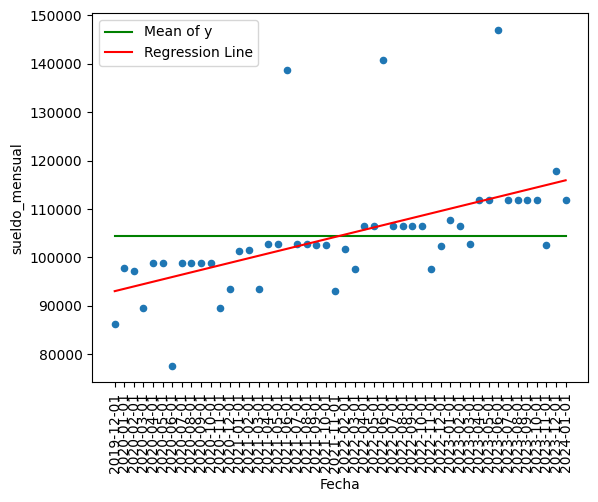

In [15]:
# Cargar el DataFrame
df = pd.read_csv("../csv/typed_uanl.csv")

# Agrupar y agregar los datos
df_by_sal = df.groupby("Fecha")\
              .aggregate(sueldo_mensual=pd.NamedAgg(column="Sueldo Neto", aggfunc="max"))

# Reiniciar el índice
df_by_sal.reset_index(inplace=True)

# Imprimir los primeros datos usando tabulate
print_tabulate(df_by_sal.head())

# Ejecutar la regresión lineal con la librería statsmodels
linear_regression(df_by_sal, "Fecha", "sueldo_mensual")

|    | Fecha      |   sueldo_mensual |
|----+------------+------------------|
|  0 | 2019-12-01 |          86245.3 |
|  1 | 2020-01-01 |          97698.4 |
|  2 | 2020-02-01 |          97274.6 |
|  3 | 2020-03-01 |          89433.9 |
|  4 | 2020-04-01 |          98882   |
coef: 487.5171195180196 intercept: 93006.52206632654
coef: 487.5171195180196 intercept: 93006.52206632654


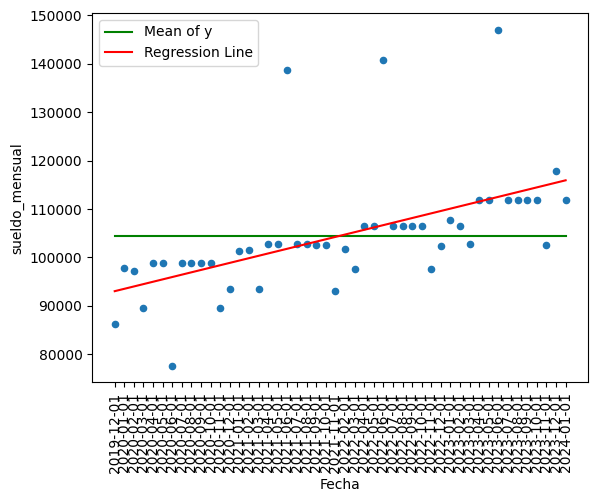

In [13]:
# Cargar el DataFrame
df = pd.read_csv("../csv/typed_uanl.csv")

# Agrupar y agregar los datos
df_by_sal = df.groupby("Fecha")\
              .aggregate(sueldo_mensual=pd.NamedAgg(column="Sueldo Neto", aggfunc="max"))

# Reiniciar el índice
df_by_sal.reset_index(inplace=True)

# Imprimir los primeros datos usando tabulate
print_tabulate(df_by_sal.head())

# Ejecutar la regresión lineal con la librería sklearn
linear_regression_model(df_by_sal, "Fecha", "sueldo_mensual")

|    | Fecha      |   sueldo_mensual |
|----+------------+------------------|
|  0 | 2019-12-01 |          86245.3 |
|  1 | 2020-01-01 |          97698.4 |
|  2 | 2020-02-01 |          97274.6 |
|  3 | 2020-03-01 |          89433.9 |
|  4 | 2020-04-01 |          98882   |
coef: 439.7774877594987 intercept: 94128.40341265178
coef: 439.7774877594987 intercept: 94128.40341265178


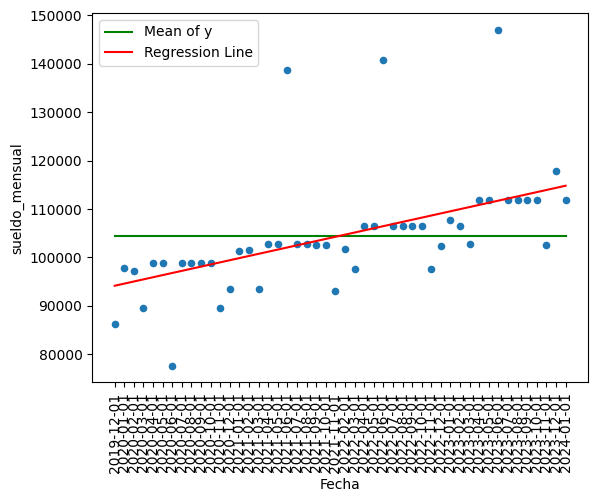

In [15]:
# Cargar el DataFrame
df = pd.read_csv("../csv/typed_uanl.csv")

# Agrupar y agregar los datos
df_by_sal = df.groupby("Fecha")\
              .aggregate(sueldo_mensual=pd.NamedAgg(column="Sueldo Neto", aggfunc="max"))

# Reiniciar el índice
df_by_sal.reset_index(inplace=True)

# Imprimir los primeros datos usando tabulate
print_tabulate(df_by_sal.head())

# Ejecutar la regresión lineal con la librería sklearn
linear_regression_ridge_model(df_by_sal, x="Fecha", y="sueldo_mensual", alpha=1000)

|    | Fecha      |   sueldo_mensual |
|----+------------+------------------|
|  0 | 2019-12-01 |          86245.3 |
|  1 | 2020-01-01 |          97698.4 |
|  2 | 2020-02-01 |          97274.6 |
|  3 | 2020-03-01 |          89433.9 |
|  4 | 2020-04-01 |          98882   |
coef: [0.32995953] intercept: [0.22173226]


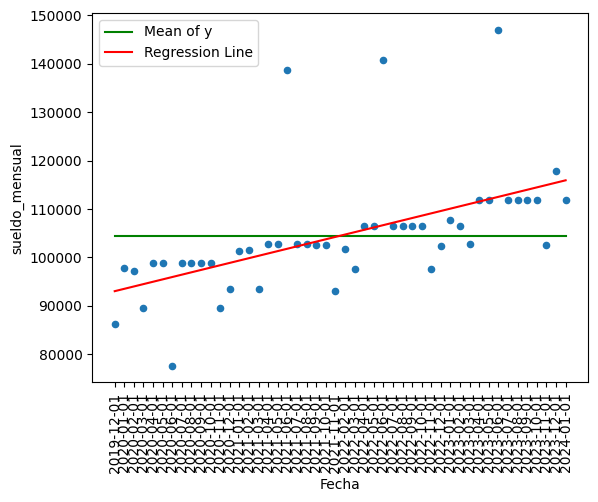

In [16]:
# Cargar el DataFrame
df = pd.read_csv("../csv/typed_uanl.csv")

# Agrupar y agregar los datos
df_by_sal = df.groupby("Fecha")\
              .aggregate(sueldo_mensual=pd.NamedAgg(column="Sueldo Neto", aggfunc="max"))

# Reiniciar el índice
df_by_sal.reset_index(inplace=True)

# Imprimir los primeros datos usando tabulate
print_tabulate(df_by_sal.head())

# Ejecutar la regresión lineal con la librería sklearn
linear_regression_ridge_min_max_model(df_by_sal, x="Fecha", y="sueldo_mensual", alpha=0.0000001)

|    | Fecha      |   sueldo_mensual |
|----+------------+------------------|
|  0 | 2019-12-01 |          86245.3 |
|  1 | 2020-01-01 |          97698.4 |
|  2 | 2020-02-01 |          97274.6 |
|  3 | 2020-03-01 |          89433.9 |
|  4 | 2020-04-01 |          98882   |
coef: 487.51711951749894 intercept: 93006.52206633877
coef: 487.51711951749894 intercept: 93006.52206633877


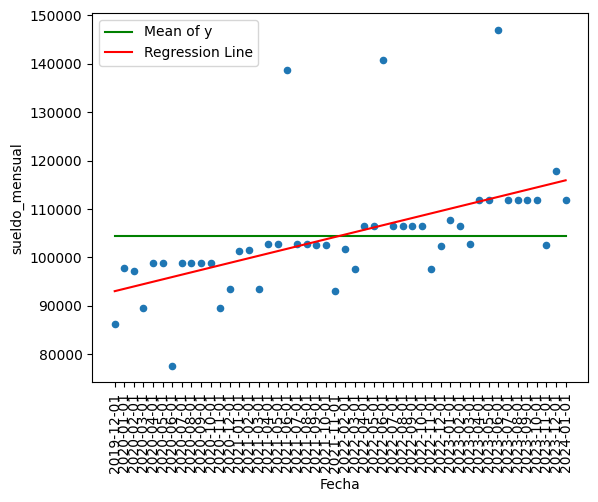

In [18]:
# Cargar el DataFrame
df = pd.read_csv("../csv/typed_uanl.csv")

# Agrupar y agregar los datos
df_by_sal = df.groupby("Fecha")\
              .aggregate(sueldo_mensual=pd.NamedAgg(column="Sueldo Neto", aggfunc="max"))

# Reiniciar el índice
df_by_sal.reset_index(inplace=True)

# Imprimir los primeros datos usando tabulate
print_tabulate(df_by_sal.head())

# Ejecutar la regresión lineal con la librería sklearn
linear_regression_lasso_model(df_by_sal, x="Fecha", y="sueldo_mensual", alpha=0.0000001)